# 1. Data Source and Contents

In [79]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [80]:
url = "https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true"
df = pd.read_csv(url)

In [81]:
## Print first few rows
print(df.head())

  hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0  


In [82]:
## print the DataFrame's shape
print(df.shape)

(48842, 11)


In [83]:
## print the DataFrame's data types
pd.set_option('display.max_rows', None)
#pd.reset_option('max_rows')
print(df.dtypes)

hours_per_week_bin    object
occupation_bin        object
msr_bin               object
capital_gl_bin        object
race_sex_bin          object
education_num_bin     object
education_bin         object
workclass_bin         object
age_bin               object
flag                  object
y                      int64
dtype: object


In [84]:
## check for missing values
print(df.isnull().sum())

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64


In [85]:
# ENCODE CATEGORICAL VARIABLES TO NUMERICAL DUMMY COLUMNS -- mandatory before using ScikitLearn

In [86]:
cols = ['hours_per_week_bin', 'occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_num_bin','education_bin','workclass_bin','age_bin']
df_encoded = pd.get_dummies(df,columns = cols)

In [87]:
df_encoded.head()

,flag,y,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,...,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,workclass_bin_a. no income,workclass_bin_b. income,age_bin_a. 0-25,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55
0,train,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1,train,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,train,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,train,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,train,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0


In [88]:
#Split Data
train= df_encoded.loc[df_encoded.flag == 'train']
train.head()

,flag,y,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,...,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,workclass_bin_a. no income,workclass_bin_b. income,age_bin_a. 0-25,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55
0,train,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1,train,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,train,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,train,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,train,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0


In [89]:
test= df_encoded.loc[df_encoded.flag == 'test']
test.head()

,flag,y,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,...,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,workclass_bin_a. no income,workclass_bin_b. income,age_bin_a. 0-25,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55
32561,test,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
32562,test,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
32563,test,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
32564,test,1,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
32565,test,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [90]:
train = train.drop('flag', axis=1)

In [91]:
train.head()

,y,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,...,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,workclass_bin_a. no income,workclass_bin_b. income,age_bin_a. 0-25,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55
0,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0


In [92]:
test = test.drop('flag', axis=1)

In [93]:
test.head()

,y,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,...,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,workclass_bin_a. no income,workclass_bin_b. income,age_bin_a. 0-25,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55
32561,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
32562,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
32563,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
32564,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
32565,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [94]:
# PREPARE FOR MACHINE LEARNING (ScikitLearn)

In [95]:
X_train = train.drop('y', axis=1)
y_train = train['y']

In [96]:
X_test = train.drop('y', axis=1)
y_test = train['y']

### Random Forest Model

In [97]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [98]:
t = RandomForestClassifier(n_estimators=100,max_features='auto',random_state=101)
t.fit(X_train,y_train)
y_predicted=t.predict(X_test)

In [99]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
# Check Performance

# Printing classifier report after prediction
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     24720
           1       0.76      0.64      0.69      7841

    accuracy                           0.86     32561
   macro avg       0.83      0.79      0.80     32561
weighted avg       0.86      0.86      0.86     32561



In [100]:
# Encode  the train data sets (X_train)
oe = preprocessing.OrdinalEncoder()
oe.fit(X_train)
X_train= oe.transform(X_train)
X_train= pd.DataFrame(X_train)
# Encode the test data sets 
oe.fit(X_test)
X_test= oe.transform(X_test)
X_test= pd.DataFrame(X_test)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=101)

In [106]:
# Define the values for the n_estimators hyperparameter
n_estimators_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

In [108]:
# Train a Random Forest Model for each n_estimators value and calculate accuracy and AUC scores
results_acc = [accuracy_score(y_test, RandomForestClassifier(n_estimators=n, random_state=101).fit(x_train, y_train).predict(x_test)) for n in n_estimators_options]

results_auc = [roc_auc_score(y_test, RandomForestClassifier(n_estimators=n, random_state=101).fit(x_train, y_train).predict(x_test)) for n in n_estimators_options]

In [ ]:
# Plot the Accuracy vs. n_estimators graph
plt.figure(figsize=(8,4))
pd.Series(results_acc, n_estimators_options).plot(color="red", marker="v")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. n_estimators")

Text(0.5, 1.0, 'AUC vs. n_estimators')

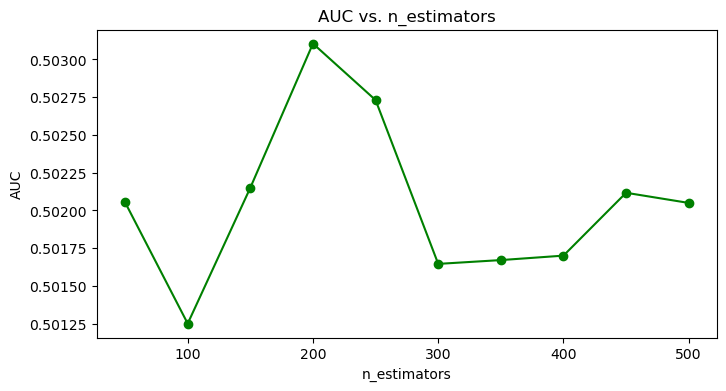

In [109]:
# Plot the AUC vs. n_estimators graph
plt.figure(figsize=(8,4))
pd.Series(results_auc, n_estimators_options).plot(color="green", marker="o")
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.title("AUC vs. n_estimators")

In [ ]:
#ALGORITHM: ADABOOST CLASSIFIER

In [110]:
n_estimators_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

results_acc_ada = [accuracy_score(y_test, AdaBoostClassifier(n_estimators=n, random_state=101).fit(x_train, y_train).predict(x_test)) for n in n_estimators_options]

results_auc_ada = [roc_auc_score(y_test, AdaBoostClassifier(n_estimators=n, random_state=101).fit(x_train, y_train).predict(x_test)) for n in n_estimators_options]

Text(0.5, 1.0, 'AdaBoost Classifier: Accuracy vs. n_estimators')

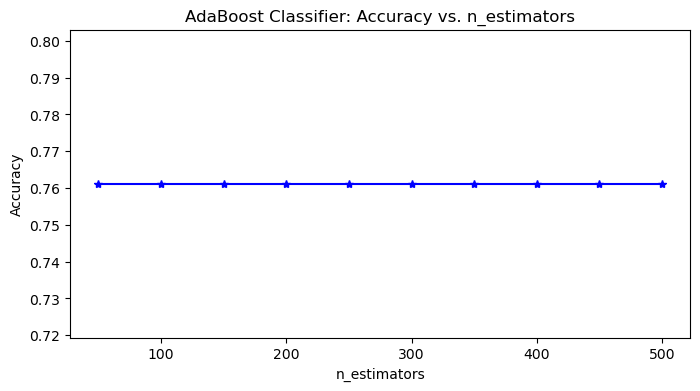

In [118]:
# Plot the Accuracy vs. n_estimators graph for AdaBoost Classifier
plt.figure(figsize=(8,4))
pd.Series(results_acc_ada, n_estimators_options).plot(color="blue", marker="*")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("AdaBoost Classifier: Accuracy vs. n_estimators")

Text(0.5, 1.0, 'AdaBoost Classifier: AUC vs. n_estimators')

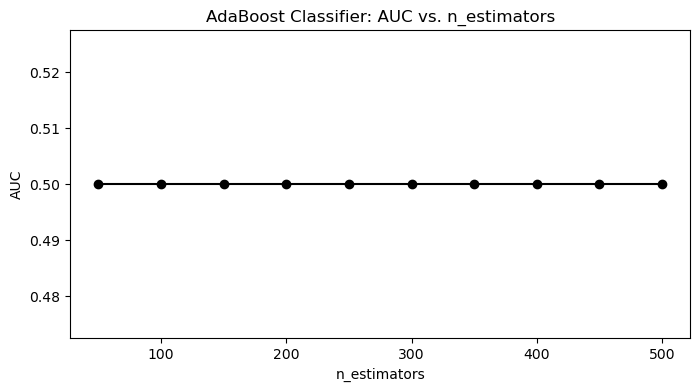

In [111]:
plt.figure(figsize=(8,4))
pd.Series(results_auc_ada, n_estimators_options).plot(color="black", marker="o")
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.title("AdaBoost Classifier: AUC vs. n_estimators")

###### ALGORITHM GRADIENT BOOSTING CLASSIFIER

In [112]:
# Train a Gradient Boost Model for each n_estimators value and calculate accuracy and AUC scores
results_acc_gb = [accuracy_score(y_test, GradientBoostingClassifier(n_estimators=n, random_state=101).fit(x_train, y_train).predict(x_test)) for n in n_estimators_options]
results_auc_gb = [roc_auc_score(y_test, GradientBoostingClassifier(n_estimators=n, random_state=101).fit(x_train, y_train).predict(x_test)) for n in n_estimators_options]

Text(0.5, 1.0, 'Gradient Boost: Accuracy vs. n_estimators')

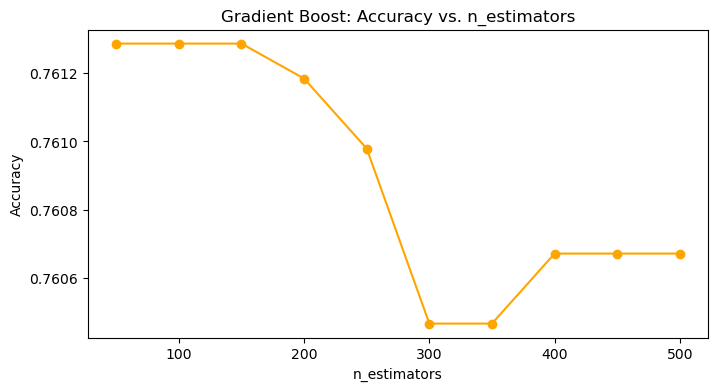

In [113]:
# Plot the Accuracy vs. n_estimators graph for Gradient Boost
plt.figure(figsize=(8,4))
pd.Series(results_acc_gb, n_estimators_options).plot(color="orange", marker="o")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Gradient Boost: Accuracy vs. n_estimators")

Text(0.5, 1.0, 'Gradient Boost: AUC vs. n_estimators')

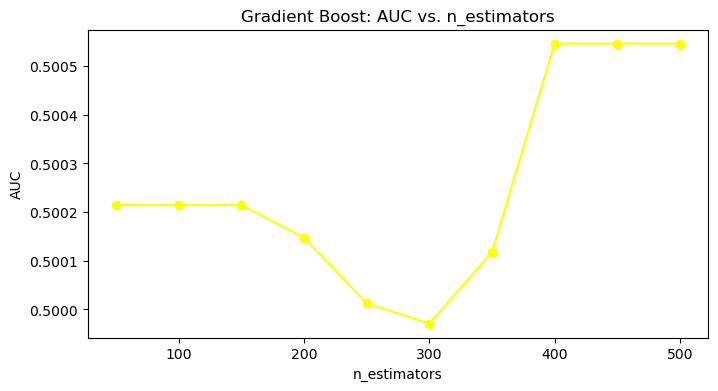

In [114]:
# Plot the AUC vs. n_estimators graph for Gradient Boost
plt.figure(figsize=(8,4))
pd.Series(results_auc_gb, n_estimators_options).plot(color="yellow", marker="o")
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.title("Gradient Boost: AUC vs. n_estimators")

In [119]:
n_estimators_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Train an XGB Model for each n_estimators value and calculate accuracy and AUC scores
results_acc_xgb = [accuracy_score(y_test, XGBClassifier(n_estimators=n, random_state=101).fit(x_train, y_train).predict(x_test)) for n in n_estimators_options]
results_auc_xgb = [roc_auc_score(y_test, XGBClassifier(n_estimators=n, random_state=101).fit(x_train, y_train).predict(x_test)) for n in n_estimators_options]

Text(0.5, 1.0, 'XGB: Accuracy vs. n_estimators')

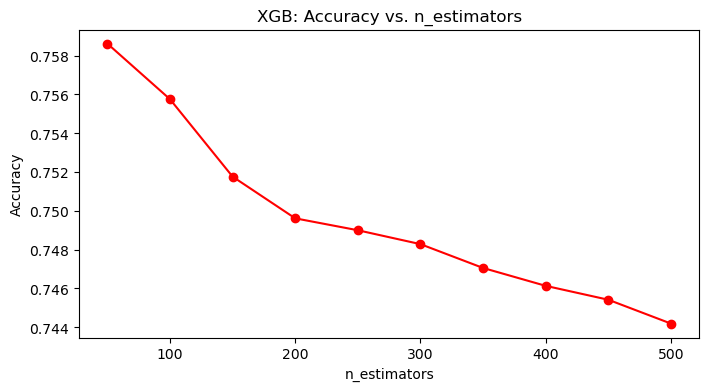

In [120]:
# Plot the Accuracy vs. n_estimators graph for XGB
plt.figure(figsize=(8,4))
pd.Series(results_acc_xgb, n_estimators_options).plot(color="red", marker="o")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("XGB: Accuracy vs. n_estimators")

Text(0.5, 1.0, 'XGB: AUC vs. n_estimators')

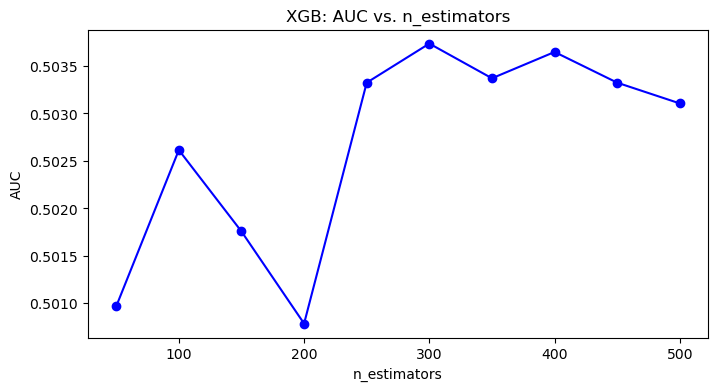

In [121]:
# Plot the AUC vs. n_estimators graph for XGB
plt.figure(figsize=(8,4))
pd.Series(results_auc_xgb, n_estimators_options).plot(color="blue", marker="o")
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.title("XGB: AUC vs. n_estimators")

In [122]:
#Determine the value of n_estimators that results in the highest accuracy score for each of the models.
rf_best_n = max(zip(results_acc, n_estimators_options))[1]
ada_best_n = max(zip(results_acc_ada, n_estimators_options))[1]
gb_best_n = max(zip(results_acc_gb, n_estimators_options))[1]
xgb_best_n = max(zip(results_acc_xgb, n_estimators_options))[1]

rf_best_auc = max(zip(results_auc, n_estimators_options))[0]
ada_best_auc = max(zip(results_auc_ada, n_estimators_options))[0]
gb_best_auc = max(zip(results_auc_gb, n_estimators_options))[0]
xgb_best_auc = max(zip(results_auc_xgb, n_estimators_options))[0]

In [123]:
comp_dict = [
    {'Metric': 'ACC', 'Random Forest': max(results_acc), 'AdaBoost': max(results_acc_ada), 
     'Gradient Boost': max(results_acc_gb), 'XGB': max(results_acc_xgb)},
    {'Metric': 'AUC', 'Random Forest': rf_best_auc, 'AdaBoost': ada_best_auc, 
     'Gradient Boost': gb_best_auc, 'XGB': xgb_best_auc}
]


In [124]:
comp_df = pd.DataFrame(comp_dict).set_index('Metric')

Based on the analysis of the classifiers' behavior with respect to the number of estimators, it can be observed that increasing the number of estimators generally leads to better accuracy and AUC scores for Random Forest and AdaBoost. However, the rate of improvement decreases with each additional estimator, and eventually plateaus or decreases after a certain point. For Gradient Boost and XGBoost, the improvement in accuracy and AUC scores is slower and may not yield significant improvement beyond a certain number of estimators.

The optimal number of estimators varies among the classification models used. For the Random Forest and XGBoost models, the highest accuracy and AUC scores are achieved between 100 and 200 estimators, while the Gradient Boost model performs best with around 200 estimators. In contrast, the optimal number of estimators for the AdaBoost model is at the beginning of the range at 50. Based on these findings, a range of 100 to 200 estimators can be considered optimal for the given range of 50 to 500.